In [1]:
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
import seaborn as sns

# tex_fonts = {
#     # Use LaTeX to write all text
#     # "text.usetex": True,
#     "font.family": "serif",
#     "axes.labelsize": 10,
#     "font.size": 10,
#     # Make the legend/label fonts a little smaller
#     "legend.fontsize": 9,
#     "xtick.labelsize": 9,
#     "ytick.labelsize": 9,
# }

# sns.set_theme(
#     # context="talk",
#     context="paper",
#     # rc={"figure.figsize": (8, 6)},
#     # palette="colorblind6",
#     style="whitegrid",
#     rc=tex_fonts,
# )

data = {
    1: load_data("../stats/fpm_4_2D_x1.json"),
    4: load_data("../stats/fpm_4_2D_x4.json"),
    2: load_data("../stats/fpm_4_2D_x2.json"),
    5: load_data("../stats/fpm_4_2D_x5.json"),
    3: load_data("../stats/fpm_4_2D_x3.json"),
    6: load_data("../stats/fpm_4_2D_x6.json"),
}

# data = {
#     1: load_data("../stats/fpm_4_2D_solver_2_exact_x1.json"),
#     4: load_data("../stats/fpm_4_2D_solver_2_exact_x4.json"),
#     2: load_data("../stats/fpm_4_2D_solver_2_exact_x2.json"),
#     5: load_data("../stats/fpm_4_2D_solver_2_exact_x5.json"),
#     3: load_data("../stats/fpm_4_2D_solver_2_exact_x3.json"),
#     6: load_data("../stats/fpm_4_2D_solver_2_exact_x6.json"),
# }

# data = {
#     1: load_data("../stats/fpm_4_2D_solver_2_symmetric_x1.json"),
#     4: load_data("../stats/fpm_4_2D_solver_2_symmetric_x4.json"),
#     2: load_data("../stats/fpm_4_2D_solver_2_symmetric_x2.json"),
#     5: load_data("../stats/fpm_4_2D_solver_2_symmetric_x5.json"),
#     3: load_data("../stats/fpm_4_2D_solver_2_symmetric_x3.json"),
#     6: load_data("../stats/fpm_4_2D_solver_2_symmetric_x6.json"),
# }

# data = {
#     'baseline': load_data("../stats/fpm_4_2D_solver_2_exact_x1.json"),
#     'elastic': load_data("../stats/fpm_4_2D_solver_2_exact_x1_Barton-Bandis.json"),
# }

ax_names = {
    1: "Cell size: h",
    2: "Cell size: h / 2",
    3: "Cell size: h / 3",
    4: "Cell size: h / 4",
    5: "Cell size: h / 5",
    6: "Cell size: h / 6",
}


save_path = "../figures/fpm_4_2D_"

/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import trange  # type: ignore


In [2]:
shape = [3, 2]
figsize = (12, 6)

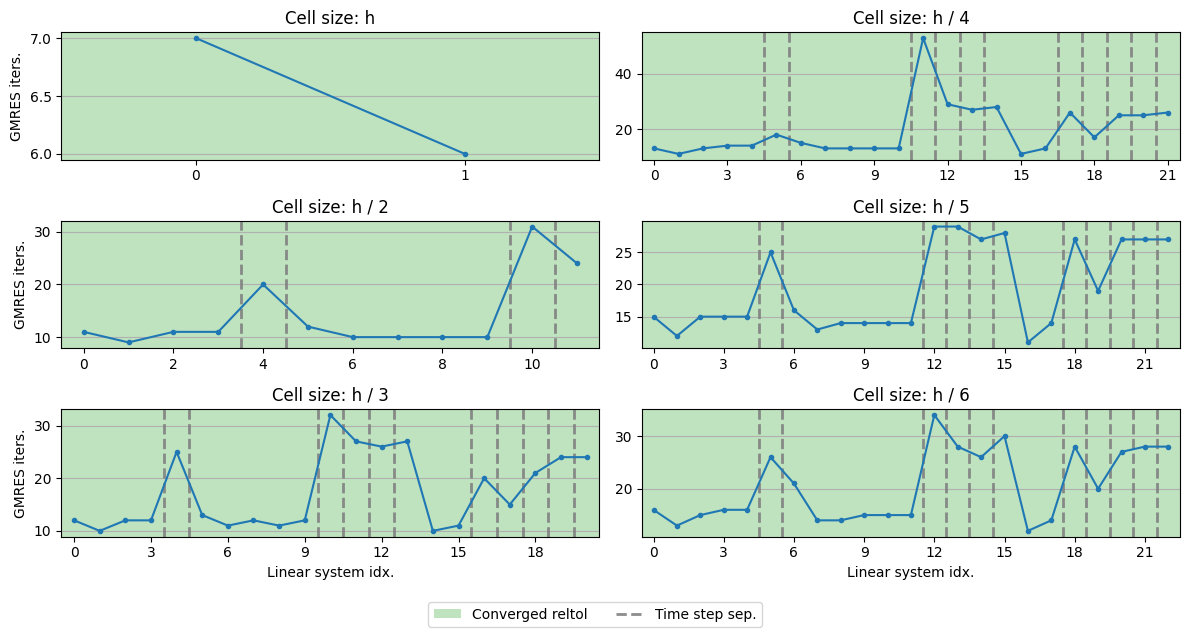

In [3]:
def render_element(entry: Sequence[TimeStepStats]):
    color_converged_reason(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which='major', axis='y')
    plt.plot(get_gmres_iterations(entry), marker=".")


plot_grid(data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=ax_names)
plt.savefig(save_path + 'gmres_iters_convergence.pdf', bbox_inches='tight')

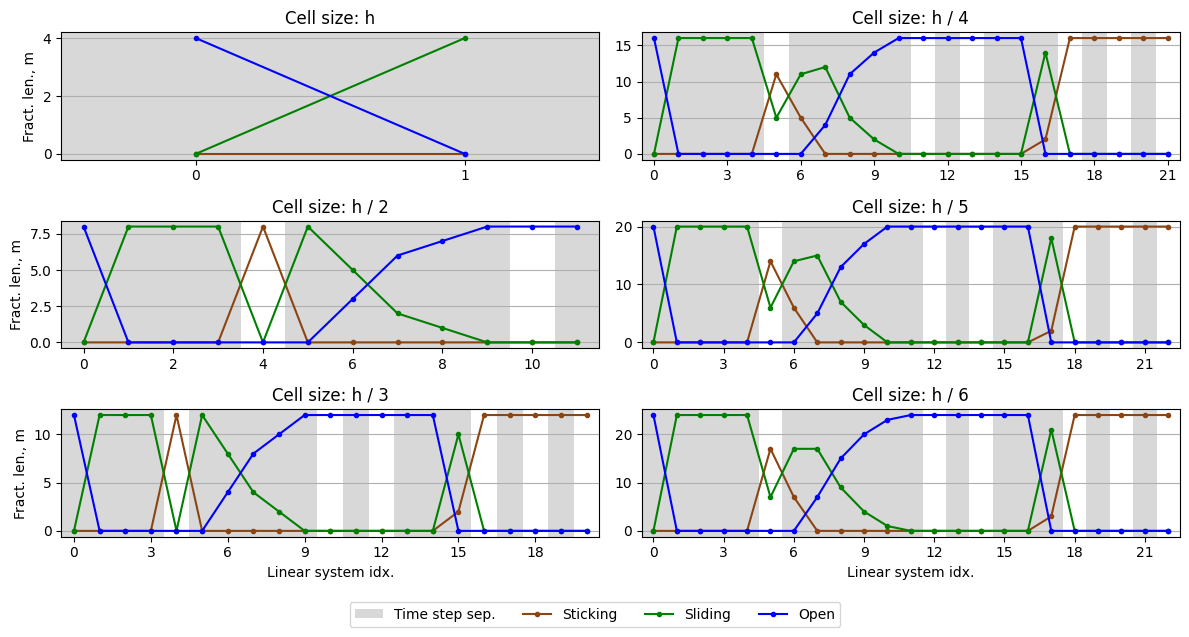

In [4]:
def render_element(i: int, entry: Sequence[TimeStepStats]):
    # st, sl, op, tr = get_volume_sticking_sliding_open_transition(
    #     entry, dofs_info_path="../stats/dofs_info_fpm_4_2d.json", cell_size_multiplier=i
    # )
    st, sl, op, tr = get_num_sticking_sliding_open_transition(entry, transition_as_open=True)
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which='major', axis='y')
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)
    # plt.plot(tr, label="Transition", marker=".", color=COLOR_TRANSITION)


plot_grid(data, render_element, shape=shape, figsize=figsize, ylabel="Fract. len., m", ax_titles=ax_names)
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

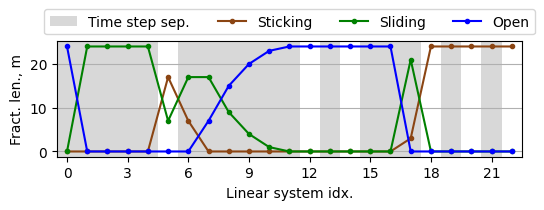

In [5]:
plt.figure(figsize=(6, 1.5))
render_element(i=6, entry=data[6])
plt.ylabel("Fract. len., m")
plt.xlabel("Linear system idx.")
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=5,
    fancybox=True,
)
plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

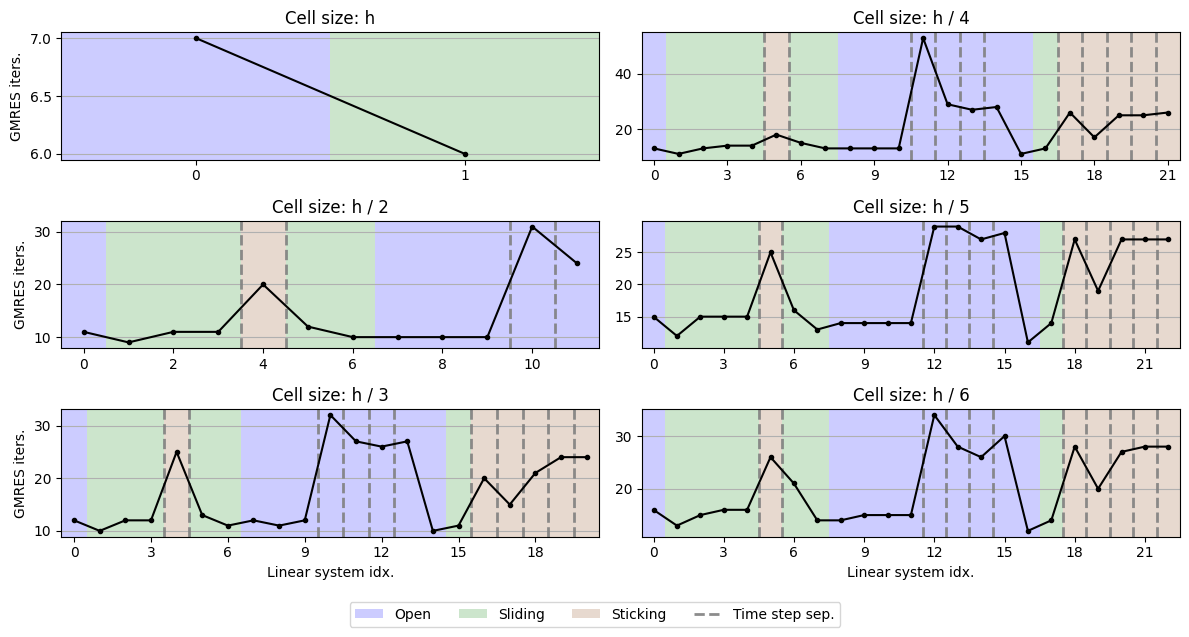

In [6]:
def render_element(entry: Sequence[TimeStepStats]):
    color_sticking_sliding_open_transition(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which='major', axis='y')
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")



axes = plot_grid(data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=ax_names)

plt.savefig(save_path + 'gmres_fracture_state_exact_inv.pdf', bbox_inches='tight')

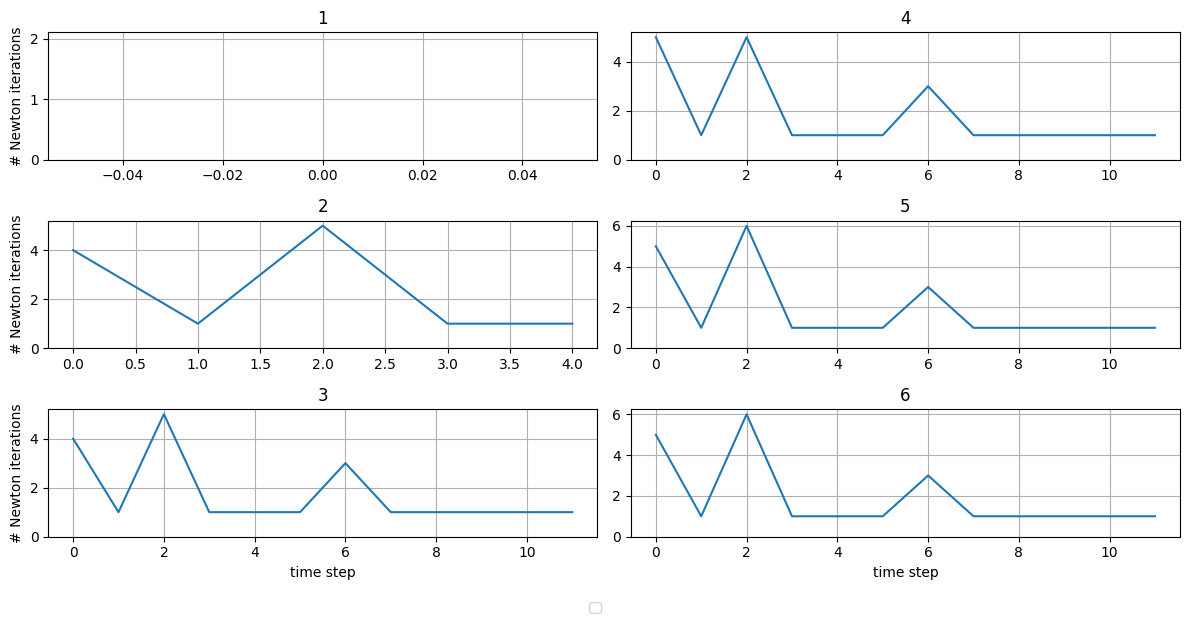

In [7]:
def render_element(entry: Sequence[TimeStepStats]):
    plt.plot(get_newton_iterations(entry))
    plt.ylim(bottom=0)
    plt.grid(visible=True)


plot_grid(
    data,
    render_element,
    shape=shape,
    figsize=figsize,
    ylabel="# Newton iterations",
    xlabel="time step",
)

Text(0.5, 0, 'Simulation time, s')

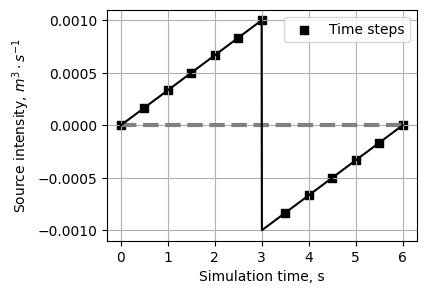

In [8]:
from fpm_4_2D import make_model

model = make_model(cell_size_multiplier=1)
model.prepare_simulation()
source = []
t_list = np.linspace(0, 6, 13, endpoint=True)
for t in t_list:
    source.append(model.get_source_intensity(t))

source_fine = []
t_list_fine = np.linspace(0, 6, 1000, endpoint=True)
for t in t_list_fine:
    source_fine.append(model.get_source_intensity(t))

plt.figure(figsize=(4, 3))
plt.plot([0, 6], [0, 0], color='grey', linestyle='--', linewidth=3)
plt.plot(t_list_fine, source_fine, color="black")
plt.scatter(t_list, source, marker="s", label="Time steps", color="black")
plt.grid()
plt.legend()    
plt.ylabel(r"Source intensity, $m^3 \cdot s^{-1}$")
plt.xlabel("Simulation time, s")

# Testing bad matrix

In [9]:
assert False

AssertionError: 

In [15]:
from fpm_4_2D import make_model
from mat_utils import *
from fixed_stress import *

cell_size_multiplier = 1
model = make_model(cell_size_multiplier=cell_size_multiplier)
model.prepare_simulation()
model.before_nonlinear_loop()
model.before_nonlinear_iteration()
model._initialize_solver()



num sticking: 0
num sliding: 0
num open: 0
num transition: 4


In [21]:
mat_idx = 1
entry = data[cell_size_multiplier]
print(get_gmres_iterations(entry)[mat_idx])
mat, rhs, state, iterate, dt = load_matrix_rhs_state_iterate_dt(entry, mat_idx)

6


In [23]:
model.linear_system = mat, rhs
model.equation_system.set_variable_values(iterate, iterate_index=0)
model.equation_system.set_variable_values(state, time_step_index=0)  # 1

model.ad_time_step.set_value(dt)
st, sl, op, tr = model.sticking_sliding_open_transition()
print(sum(st))
print(sum(sl))
print(sum(op))
print(sum(tr))

0
4
0
0


ValueError: Invalid format specifier 'data' for object of type 'float'

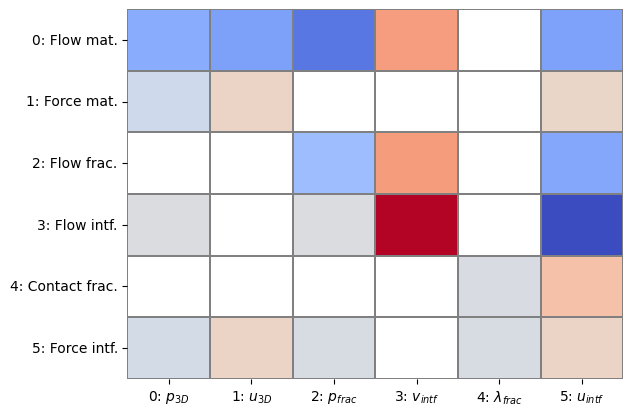

In [44]:
model.bmat.plot_max(annot=True)

<Axes: >

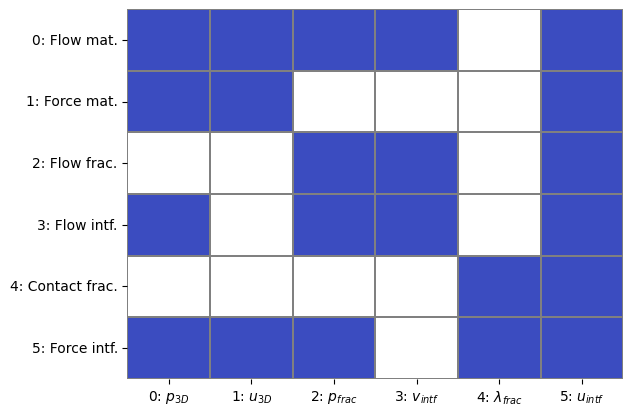

In [38]:
import matplotlib
self = model.bmat
groups = True
row_idx, col_idx = self.get_active_local_dofs(grouped=groups)
data = []

for row in row_idx:
    row_data = []
    for col in col_idx:
        I, J = np.meshgrid(row, col, sparse=True, indexing="ij", copy=False)
        submat = self.mat[I, J]
        if submat.data.size == 0:
            row_data.append(np.nan)
        else:
            row_data.append(abs(submat).max())
    data.append(row_data)

if groups:
    y_tick_labels, x_tick_labels = self.get_active_group_names()
else:
    y_tick_labels = x_tick_labels = "auto"

ax = plt.gca()
data = np.array(data)
data[np.isfinite(data)] = 1
sns.heatmap(
    data=data,
    square=False,
    # annot=True,
    norm=matplotlib.colors.LogNorm(),
    fmt=".1e",
    xticklabels=x_tick_labels,
    yticklabels=y_tick_labels,
    ax=ax,
    linewidths=0.01,
    linecolor="grey",
    cbar=False,
    cmap=sns.color_palette("coolwarm", as_cmap=True),
)

array([[ True,  True,  True,  True, False,  True],
       [ True,  True, False, False, False,  True],
       [False, False,  True,  True, False,  True],
       [ True, False,  True,  True, False,  True],
       [False, False, False, False,  True,  True],
       [ True,  True,  True, False,  True,  True]])

/home/porepy/.local/lib/python3.11/site-packages/scipy/sparse/_index.py:134: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


Solve  took: 0.0
True residual permuted: 4.206650588464036e-11
True residual: 4.20665060845003e-11
PETSc Converged Reason: 2


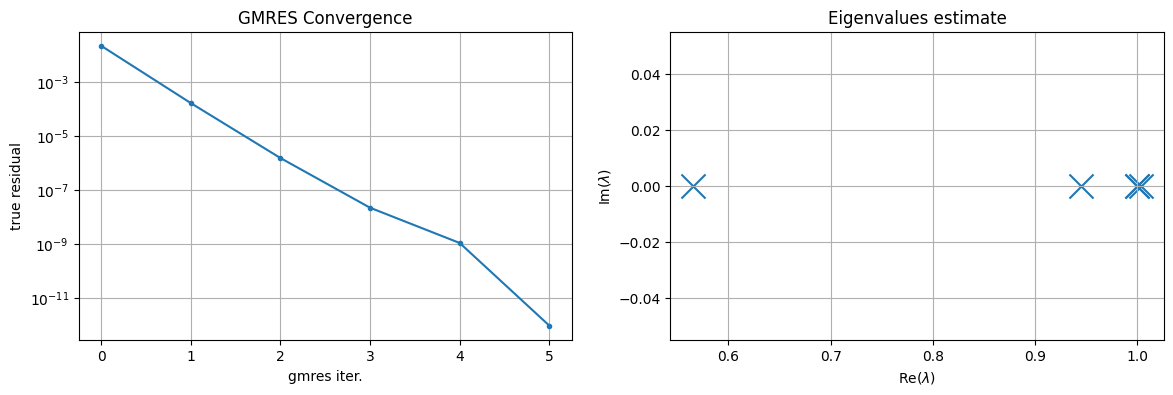

In [25]:
schema = model._prepare_solver()
_ = solve_petsc_new(
    model.bmat,
    schema,
    rhs_global=rhs,
    # Qleft=model._Qleft,
    Qright=model._Qright,
    pc_side="right",
    tol=1e-10,
)

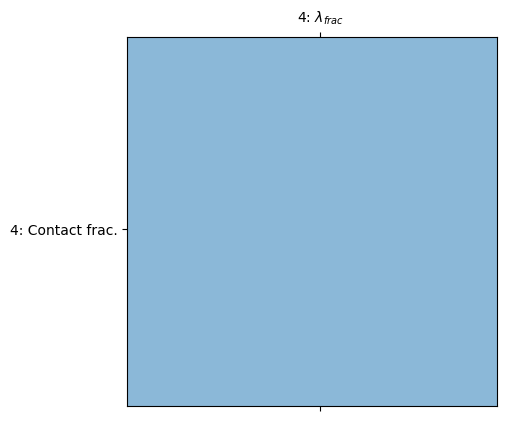

In [32]:
J = model.bmat.copy()
J[[4]].color_spy()

In [1]:
np.save('rhs02.npy', model.bmat[[0,2]].local_rhs(rhs))
scipy.sparse.save_npz('J02.npz', model.bmat[[0,2]].mat)

NameError: name 'np' is not defined

Solve  took: 2.15
True residual permuted: 3.305663536622943e-08
True residual: 3.99294825261982e-08
PETSc Converged Reason: 2


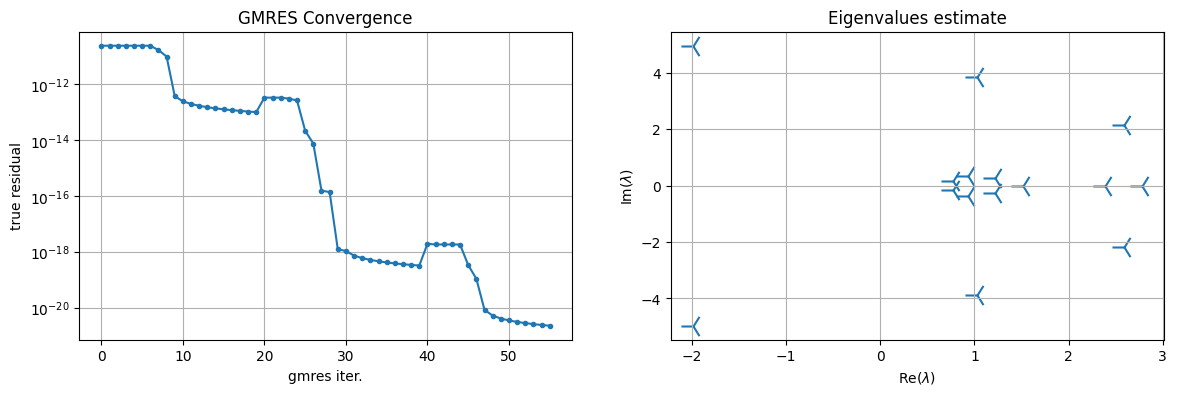

In [34]:
from block_matrix import SolveSchema

schema = SolveSchema(
    groups=[4],
    solve=lambda bmat: inv_block_diag(mat=bmat[[4]].mat, nd=model.nd),
    complement=SolveSchema(
        groups=[3],
        complement=SolveSchema(
            groups=[1, 5],
            invertor_type="physical",
            invertor=lambda bmat: make_fs_experimental(model, bmat).mat,
            complement=SolveSchema(
                groups=[0, 2],
            ),
        ),
    ),
)

_ = solve_petsc_new(
    model.bmat,
    schema,
    rhs_global=rhs,
    Qleft=model._Qleft,
    Qright=model._Qright,
    pc_side="right",
    tol=1e-10,
)

In [35]:
bmat = model.bmat.copy()


J55_inv = inv_block_diag(bmat[[5]].mat, nd=model.nd, lump=False)
# J55_inv = inv(bmat[[5]].mat)


Qleft = bmat.empty_container()
Qleft.mat = csr_ones(Qleft.shape[0])
Qright = Qleft.copy()

Qleft[4, 5] = -bmat[4, 5].mat @ J55_inv
Qright[5, 4] = -J55_inv @ bmat[5, 4].mat


/home/porepy/.local/lib/python3.11/site-packages/scipy/sparse/_index.py:134: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


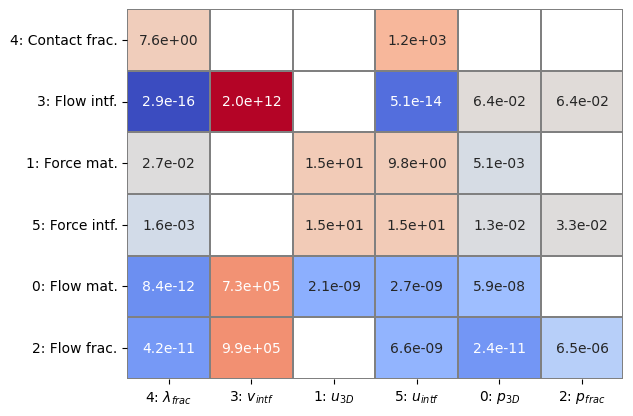

In [36]:
Jr = bmat.empty_container()
Jr.mat = bmat.mat @ Qright.mat
Jr[[4, 3, 1, 5, 0, 2]].plot_max()

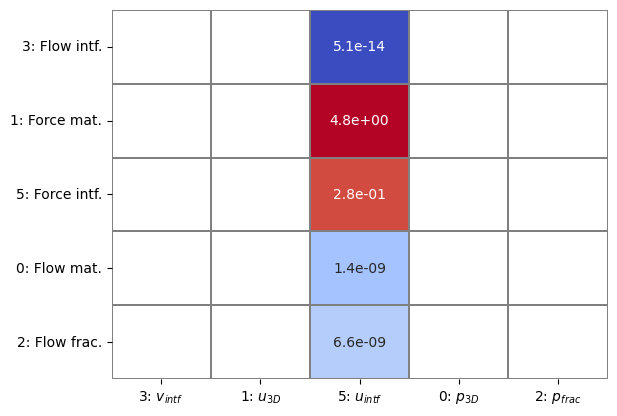

In [37]:
Jr = Jr[[4, 3, 1, 5, 0, 2]]

def schur(mat: BlockMatrixStorage, elim, keep=None, plot_stab=True):
    if keep is None:
        keep = list(i for i in mat.active_groups[0] if i not in elim)
    stab = mat.empty_container()[keep, keep]
    stab.mat = mat[keep, elim].mat @ inv(mat[elim, elim].mat) @ mat[elim, keep].mat
    if plot_stab:
        stab.plot_max()
    schur = mat[keep, keep].copy()
    schur.mat -= stab.mat
    return schur

schur_4 = schur(Jr, elim=[4])

In [38]:
schur_415 = schur(schur_4, elim=[1,5])

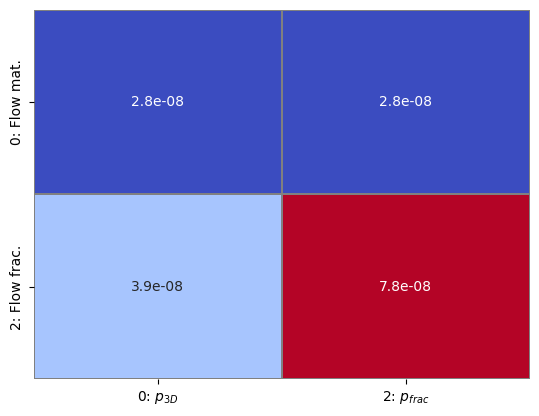

In [ ]:
schur_4153 = schur(schur_415, elim=[3])

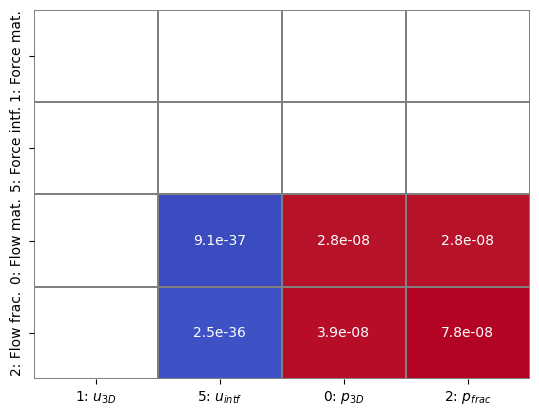

In [ ]:
schur_43 = schur(schur_4, elim=[3])

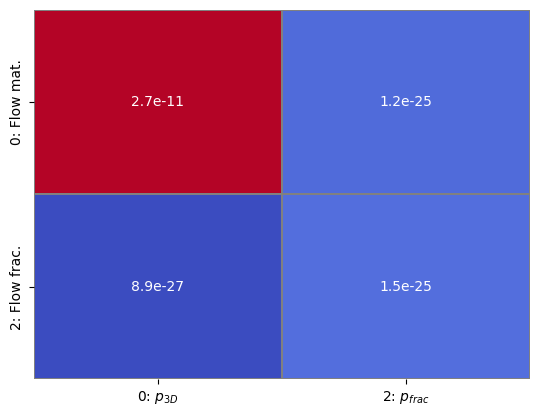

In [ ]:
schur_4315 = schur(schur_43, elim=[1,5])

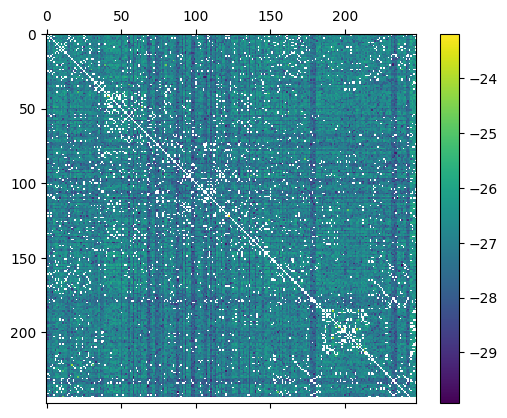

In [ ]:
plot_mat(schur_4315.mat - schur_4153.mat)